# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: **
Classification, as the output is discrete, finite and known beforehand on the training set.

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [1]:
%matplotlib inline

# Import libraries
from __future__ import division

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from time import time
from sklearn.metrics import f1_score
from IPython.display import display

# Read student data
student_data = pd.read_csv("student-data.csv")
display(student_data.head(5))

print "Student data read successfully!"

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


Student data read successfully!


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [2]:
# Calculate number of students
n_students = len(student_data)

# Calculate number of features
n_features = len(student_data.columns) - 1  # Exclude the target label

# Calculate passing students
n_passed = (student_data.passed == 'yes').sum()

# Calculate failing students
n_failed = (student_data.passed == 'no').sum()

assert n_passed + n_failed == n_students, 'There are invalid labels on the dataset'

# Calculate graduation rate
grad_rate = n_passed / n_students * 100

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Samples per feature ratio: {}".format(n_students/n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

print("\nNumerical features:")
display(student_data.describe(include=[int, float]))

Total number of students: 395
Number of features: 30
Samples per feature ratio: 13.1666666667
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%

Numerical features:


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


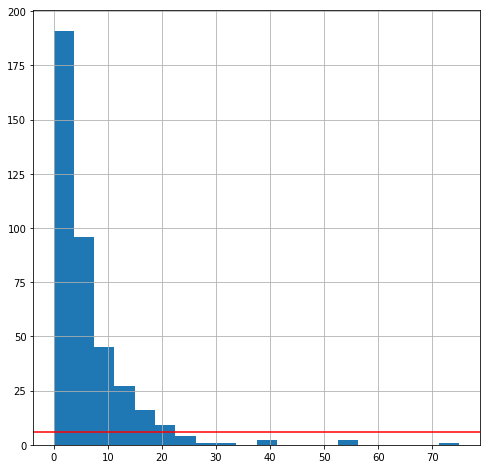

In [3]:
plt.figure(figsize=(8,8))
plt.hist(student_data.absences, bins=20)
plt.axhline(y=student_data.absences.mean(), c='red')
plt.grid()
plt.show()

Looking at the plot above, we can see that `absences` is very skewed. We can apply a log transformation to make it behave well when fed to the model.

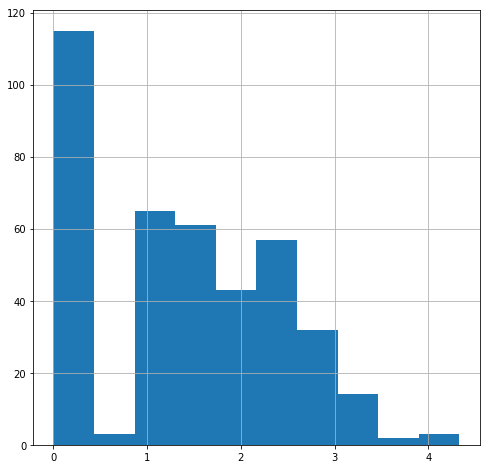

In [4]:
plt.figure(figsize=(8,8))
plt.hist(np.log(student_data.absences + 1))
plt.grid()
plt.show()

## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [5]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_raw = student_data.loc[:, feature_cols]
y_all = student_data.loc[:, target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
display(X_raw.head())

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4


### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

#### Extra: Feature Scaling
Some classifiers are sensitive about the scale of the features, like k-NN, SVM and regularized linear classifiers. Scaling features to similar ranges also provides more numerical stability, which is good for convergence of optimization algorithms.
Also, we have seen that `absences` is very skewed, so a log transform is applied to make it more normal.

In [6]:
def preprocess_features(X, unskew_absences, scale_numeric):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    def is_binary(series):
        return set(series) == {'yes', 'no'}
    
    def minmax_scale(values):
        min_value = values.min()
        values_range = values.max() - min_value
        return (values - min_value)/values_range
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        if unskew_absences and col == 'absences':
            col_data = col_data.apply(lambda x: np.log(x + 1))
            
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            if is_binary(col_data):
                col_data = col_data.replace(['yes', 'no'], [1, 0])
                assert col_data.dtype == int
            else:  # If data type is categorical, convert to dummy variables
                # Example: 'school' => 'school_GP' and 'school_MS'
                col_data = pd.get_dummies(col_data, prefix = col)
        elif col_data.dtype in [int, float] and scale_numeric:
            print('Scaling feature ' + col)
            col_data = minmax_scale(col_data)
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_raw, False, False)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))
display(X_all.head(1))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,1,0,1,0,18,0,1,1,0,1,...,1,0,0,4,3,4,1,1,3,6


Embedding data into 2D, takes some time...


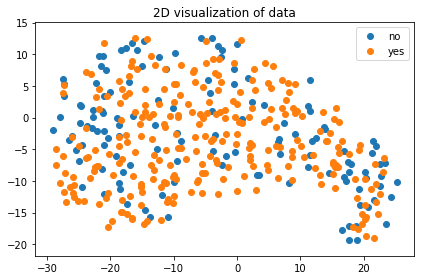

In [7]:
def plot_tsne(X, y=None, perplexity=30.0):
    from sklearn.manifold.t_sne import TSNE
    import scipy.sparse as sp

    print('Embedding data into 2D, takes some time...')
    if sp.issparse(X):
        X = X.todense()
    Xt = TSNE(perplexity=perplexity).fit_transform(X, y)

    if y is None:
        plt.plot(list(Xt[:, 0]), list(Xt[:, 1]), marker='o', linestyle='')
    else:
        df = pd.DataFrame({'x': Xt[:, 0], 'y': Xt[:, 1], 'label': y})
        groups = df.groupby('label')

        fig, ax = plt.subplots()
        for name, group in groups:
            ax.plot(list(group.x), list(group.y), marker='o', linestyle='', label=name)

        ax.legend()

    plt.title('2D visualization of data')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

# Uncomment below to see 2D plot of data
plot_tsne(X_all, y_all, 40)

### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [8]:
from sklearn.cross_validation import train_test_split
SPLIT_RANDOM_SEED = 1337

# Set the number of training points
num_train = 300

# Set the number of testing points
num_test = len(X_all) - num_train

# Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=SPLIT_RANDOM_SEED)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 300 samples.
Testing set has 95 samples.


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

**Answer: **

The idea in choosing the model is to start with simple ones that might perform somewhat well on the data and move to more complicated ones (Occam's Razor). Also, diversity is important to make sure we are looking at the problem from different angles.

#### K-Nearest Neighbors
K-Nearest neighbors have been used in [behavioral targeting](https://en.wikipedia.org/wiki/Nearest_neighbor_search#Applications) to predict, for example, which ad is most likely to be clicked by a customer, based on previous activity of himself and others.
Being non-parametric, K-Nearest Neighbors can approximate arbitrarily complex functions (given enough data). It can deal with multiclass problems without needing any adjustment and can incorporate special domain knowledge by using a distance function tailored to the problem.
K-NN is a lazy learner, which means that almost no effort is done until we are prompted to estimate something. This is advantageous in settings where training the model is more common than querying it, but disadvantageous in the opposite scenario. Also, K-NN does not work well in high-dimensional problems due to the Curse of Dimensionality, although we can mitigate this using by dimensionality reduction techniques such as PCA.

I selected K-NN because the low-dimension embedding of the data suggested that there were some clusters for students that did not pass. (And also because I was curious about the structure of the data)


#### Decision Trees
Decision Trees are useful for [credit-scoring](http://www.knowledgetaiwan.org/ojs/index.php/ijbi/article/download/77/35), among [other applications](http://www.cbcb.umd.edu/~salzberg/docs/murthy_thesis/survey/node32.html), and are known for the ease of training on large datasets, capability of handling both numerical and categorical data, extensibility for multiclass problems, dealing with nonlinear decision boundaries and interpretability.
The problem with decision trees is that they too much attention to the data and tend to produce very complicated decision boundaries (overfitting), specially when classes are not axis-aligned. Prunning may be employed, but it may become difficult for the prunned tree to explain the training data effectively.
Decision Trees are a good starting point for the problem as they offer some insight into the data, are quick to train and, after hyper-parameter selection, can become good baseline models.

This model is a good candidate for the problem because we don't have to worry about having both numeric and categorical features or even feature scaling and both training and predicting should be fast. Also, we can inspect the model to see if it matches our understanding of the problem.


#### Random Forest
Random Forest have received a lot of attention in the field of [computer vision](http://pages.iai.uni-bonn.de/frintrop_simone//BVW13/BVW-gall.pdf) to predict, for example, handwritten digits or facial features in a face photograph.
Random Forests are very versatile, performing well on a variety of problems and offer a good starting point when not much is known about the data. They are able achieve balance between bias and variance by using bagging and attribute bagging for each tree that is built (which reduces correlation between trees).
Another key aspect of Random Forests is their capability of dealing with unimportant features, which turns to be a problem with Decision Trees (see above). Some even use them solely for [feature selection](http://scikit-learn.org/stable/modules/feature_selection.html#feature-selection-as-part-of-a-pipeline)!
Unfortunately, they are not as interpretable as decision trees: it is possible to see what features the model consider important, but that is all. Also, Random Forest will struggle with classes that are not axis-aligned (as Decision Trees do) or when the data is sparse (because of attribute bagging).

This model is a good candidate for the problem reasons similar to those of Decision Trees (interpretability to a lesser degree) with the advantages of increased predictive capacity and built-in feature selection mechanism.

### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

### To the reviewer - Please read
The `f1_score` function below was using `yes` as the positive label, which, to my understanding, does not match the goal of the assignment. On the **Project Overview** it was stated that
> Graduation rates are often the criteria of choice, and educators seek new ways to predict the success and failure of students early enough to stage effective interventions.

While the majority of students pass, we have to focus our attention on those who are likely to fail. Using `yes` as the positive label, a baseline model that always predicts `yes` will get a F<sub>1</sub> score of 0.7975 on the test set but won't provide any real value to our business.

To match the problem, an adjustment was made to `pos_label`, changing its value from `yes` to `no`.

In [9]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in (seconds): {:.4f}".format(end - start)

    
def predict_labels(clf, features, target, source):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions for {} set in (seconds) {:.4f}".format(source, end - start)
    return f1_score(target.values, y_pred, pos_label='no')  # To reviewer: previously was YES. See notes above


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}".format(predict_labels(clf, X_train, y_train, 'train'))
    print "F1 score for test set: {:.4f}".format(predict_labels(clf, X_test, y_test, 'test'))
    print "Accuracy for test set: {:.4f}".format(clf.score(X_test, y_test))

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [10]:
# Import the three supervised learning models from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier

# Initialize the three models
clf_A = KNeighborsClassifier()
clf_B = DecisionTreeClassifier(random_state=4242)
clf_C = RandomForestClassifier(random_state=4242)
clf_D = DummyClassifier(strategy='constant', constant='no')


# TODO: Set up the training set sizes
X_train_100 = X_train[:100]
y_train_100 = y_train[:100]

X_train_200 = X_train[:200]
y_train_200 = y_train[:200]

X_train_300 = X_train[:300]
y_train_300 = y_train[:300]

X_train_sized = [X_train_100, X_train_200, X_train_300]
y_train_sized = [y_train_100, y_train_200, y_train_300]

# Execute the 'train_predict' function for each classifier and each training set size
for clf in [clf_A, clf_B, clf_C, clf_D]:
    for X_train_n, y_train_n in zip(X_train_sized, y_train_sized):
        train_predict(clf, X_train_n, y_train_n, X_test, y_test)
        print('\n')
    print('====')

Training a KNeighborsClassifier using a training set size of 100. . .
Trained model in (seconds): 0.0022
Made predictions for train set in (seconds) 0.0018
F1 score for training set: 0.6563
Made predictions for test set in (seconds) 0.0034
F1 score for test set: 0.4828
Accuracy for test set: 0.6842


Training a KNeighborsClassifier using a training set size of 200. . .
Trained model in (seconds): 0.0012
Made predictions for train set in (seconds) 0.0036
F1 score for training set: 0.6078
Made predictions for test set in (seconds) 0.0046
F1 score for test set: 0.4151
Accuracy for test set: 0.6737


Training a KNeighborsClassifier using a training set size of 300. . .
Trained model in (seconds): 0.0014
Made predictions for train set in (seconds) 0.0074
F1 score for training set: 0.6026
Made predictions for test set in (seconds) 0.0036
F1 score for test set: 0.5263
Accuracy for test set: 0.7158


====
Training a DecisionTreeClassifier using a training set size of 100. . .
Trained model in 

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - K-Nearest Neighbors **  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               | 0.0011                  | 0.0018                 | 0.6563           | 0.4828          |
| 200               |        0.0014           | 0.0044                 | 0.6078           | 0.4151          |
| 300               | 0.0016                  | 0.0029                 | 0.6026           |    0.5263       |

** Classifer 2 - Decision Tree Classifier**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               | 0.0013                  | 0.0004                 | 1.0000           | 0.4242          |
| 200               |     0.0021              | 0.0005                 | 1.0000           | 0.3514          |
| 300               | 0.0027                  | 0.0006                 | 1.0000           |     0.4571      |

** Classifer 3 - Random Forest Classifier **  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               | 0.0287                  | 0.0015                 | 0.9870           | 0.4928          |
| 200               | 0.0301                  | 0.0017                 | 0.9846           | 0.2857          |
| 300               | 0.0306                  | 0.0020                 | 0.9898           | 0.4667          |

** Naive Predictor **

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 300               | -                  | -                 | 0.5507           | 0.5156          |

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Choosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: **
The choice is... **K-NN**

Before we dive into the analysis, consider this: a model will be trained once in a while, but, after trained, will be used to make thousands (even more) predictions. Prediction time dominates the cost and will be the only one considered when choosing the model.

To estimate costs, we first need to estimate usage. According to [this](http://www.irrodl.org/index.php/irrodl/article/view/1651/2774), the average MOOC enroll around **43,000** students and has a typical length is 8-10 weeks. If we run our predictions on every enrolled student on a weekly basis, we will make a total of **344,000 predictions** for that course.

k-NN has the best score when trained on all the training samples (0.52) and is significantly better than Decision Trees (0.46) and Random Forest (0.47).
As for the prediction time, it would take about **3,33 seconds** (344000 * 0.0029 / 300) to make all predictions for a given course. Translating to expendings, on a `c4.xlarge` EC2 instance, running these predictions would cost the company only 0.000185 dollars per course - not something to worry about.

**Remarks:**
We might want to revisit this decision in the future, as k-NN prediction time grows in linear time as we gather more training data. The obvious choice would be selection another model but another possibility is to constrain the training set so that querying it takes a reasonable amout of time.

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: ** 
Each time we need to predict if a user will pass the course, we proceed to look for users with similar attributes on data gathered from other courses in the past. Then, we choose the k most similar ones according to a metric defined earlier and each of the chosen will cast a vote on what the prediction should be based on their labels: `yes` or `no`. The label with most votes is the one returned by the model.

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [11]:
# Import 'GridSearchCV', 'make_scorer'
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import make_scorer

# Create the parameters list you wish to tune
parameters = {
    'n_neighbors': [2, 3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3]
}

# Initialize the classifier
clf = KNeighborsClassifier()

# Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label='no')

# Perform grid search on the classifier using the f1_scorer as the scoring method
kfolds = StratifiedKFold(y_train, 5, True, SPLIT_RANDOM_SEED)
grid_obj = GridSearchCV(clf, parameters, f1_scorer, n_jobs=-1, cv=kfolds)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_obj.best_estimator_

def best_parameters(grid_search, n):
    return sorted(grid_search.grid_scores_, key=lambda x: x.mean_validation_score, reverse=True)[:n]

display(best_parameters(grid_obj, 5))

# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(best_clf, X_train, y_train, 'train'))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(best_clf, X_test, y_test, 'test'))
print "Tuned model has a accuracy of {:.4f}.".format(best_clf.score(X_test, y_test))

[mean: 0.52643, std: 0.06426, params: {'n_neighbors': 2, 'weights': 'uniform', 'p': 2},
 mean: 0.52607, std: 0.05023, params: {'n_neighbors': 2, 'weights': 'uniform', 'p': 1},
 mean: 0.46192, std: 0.08645, params: {'n_neighbors': 2, 'weights': 'uniform', 'p': 3},
 mean: 0.45702, std: 0.02877, params: {'n_neighbors': 3, 'weights': 'uniform', 'p': 2},
 mean: 0.45702, std: 0.02877, params: {'n_neighbors': 3, 'weights': 'distance', 'p': 2}]

Made predictions for train set in (seconds) 0.0066
Tuned model has a training F1 score of 0.8117.
Made predictions for test set in (seconds) 0.0038
Tuned model has a testing F1 score of 0.5227.
Tuned model has a accuracy of 0.5579.


### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

In [12]:
import itertools

from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

print "Graduation rate in training: {}".format((y_train == 'yes').mean())
print "Graduation rate in testing: {}".format((y_test == 'yes').mean())
print "----"

# X_plot = np.vstack([X_train, X_test])
# y_plot = np.concatenate([y_train, y_test + '-test'])
# plot_tsne(X_plot, y_plot.ravel(), perplexity=40)
# print "----"


def print_statistics(name, clf, X, y, X_validation=None, y_validation=None):
    if X_validation is None or y_validation is None:
        assert X_validation is None and y_validation is None
        
    print "Statistics for {}".format(name)
    if y_validation is None:
        kfolds = StratifiedKFold(y, 5, shuffle=True, random_state=SPLIT_RANDOM_SEED)
        y_pred = cross_val_predict(clf, X, y, kfolds)
        y_validation = y
    else:
        y_pred = clf.fit(X, y).predict(X_validation)
    
    display(pd.crosstab(y_validation, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))
    print "Accuracy for {}: {}".format(name, accuracy_score(y_validation, y_pred))
    print "F1 score for {}: {}".format(name, f1_score(y_validation, y_pred, pos_label='no'))
    print "Precision for {}: {}".format(name, precision_score(y_validation, y_pred, pos_label='no'))
    print "Recall for {}: {}".format(name, recall_score(y_validation, y_pred, pos_label='no'))
    print "----"    

print_statistics('Untuned K-NN on training set', clf_A, X_train, y_train)
print_statistics('Tuned K-NN on training set', best_clf, X_train, y_train)

print_statistics('Untuned K-NN on testing set', clf_A, X_train, y_train, X_test, y_test)
print_statistics('Tuned K-NN on testing set', best_clf, X_train, y_train, X_test, y_test)

Graduation rate in training: 0.676666666667
Graduation rate in testing: 0.652631578947
----
Statistics for Untuned K-NN on training set


Predicted,no,yes,All
Actual,,,
no,23,74,97
yes,24,179,203
All,47,253,300


Accuracy for Untuned K-NN on training set: 0.673333333333
F1 score for Untuned K-NN on training set: 0.319444444444
Precision for Untuned K-NN on training set: 0.489361702128
Recall for Untuned K-NN on training set: 0.237113402062
----
Statistics for Tuned K-NN on training set


Predicted,no,yes,All
Actual,,,
no,62,35,97
yes,76,127,203
All,138,162,300


Accuracy for Tuned K-NN on training set: 0.63
F1 score for Tuned K-NN on training set: 0.527659574468
Precision for Tuned K-NN on training set: 0.449275362319
Recall for Tuned K-NN on training set: 0.639175257732
----
Statistics for Untuned K-NN on testing set


Predicted,no,yes,All
Actual,,,
no,15,18,33
yes,9,53,62
All,24,71,95


Accuracy for Untuned K-NN on testing set: 0.715789473684
F1 score for Untuned K-NN on testing set: 0.526315789474
Precision for Untuned K-NN on testing set: 0.625
Recall for Untuned K-NN on testing set: 0.454545454545
----
Statistics for Tuned K-NN on testing set


Predicted,no,yes,All
Actual,,,
no,23,10,33
yes,32,30,62
All,55,40,95


Accuracy for Tuned K-NN on testing set: 0.557894736842
F1 score for Tuned K-NN on testing set: 0.522727272727
Precision for Tuned K-NN on testing set: 0.418181818182
Recall for Tuned K-NN on testing set: 0.69696969697
----


**Answer: **

|     Metric     | Naive Predictor | Untuned Model | Tuned Model |
| :------------: | :-----------------: | :---------------: | :-------------: | 
| Accuracy Score      | 0.3474         | 0.7158            | 0.5579          |
| F<sub>1</sub>-score | 0.515          | 0.5263            | 0.5227          |

The Tuned Model scored less than the Untuned Model on the testing set, which is unexpected. Upon careful examination (see the statistics on the cell above), it seems that the result was due to sampling in the train-test split, which, by luck, favored the Untuned K-NN for this task.

It is important to note, however, that although the Untuned Model appears to be the way to go, I would not expect to this this level of performance when using it on real data, as there was a huge discrepancy between testing set and cross-validation scores: `0.5263` and `0.3194` respectively.
On the other hand, the Tuned Model showed consistent performance on both testing set and cross-validation scores: `0.5227` and `0.5277` respectively.

So, **Tuned Model** is the way to go.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.